In [16]:
import os

In [17]:
import FlowCytometryTools
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate
from pylab import *


In [18]:
# data directory path
datadir = os.path.join(FlowCytometryTools.__path__[0], 'tests', 'data', 'Plate01')

In [19]:
datafile = os.path.join(datadir, 'RFP_Well_A3.fcs')

In [20]:
# Load data
tsample = FCMeasurement(ID='Test Sample', datafile=datafile)
tsample = tsample.transform('hlog', channels=['Y2-A', 'B1-A', 'V2-A'], b=500)

(array([  1.,   1.,   2.,   0.,   1.,   5.,  14.,   9.,  16.,  23.,  32.,
         53.,  67., 127.,  93., 157., 184., 211., 253., 279., 309., 354.,
        358., 471., 457., 479., 438., 474., 474., 481., 420., 452., 387.,
        351., 316., 297., 258., 253., 211., 185., 175., 121.,  99.,  80.,
         82.,  54.,  53.,  58.,  36.,  32.,  29.,  21.,  28.,  19.,  14.,
         19.,  17.,  14.,  12.,   8.,  12.,   5.,   8.,   5.,  12.,   8.,
          4.,   5.,   3.,   3.,   3.,   3.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]), array([-1486.9518  , -1425.6162  , -1364.2808  , -1302.9452  ,
        -1241.6096  , -1180.274   , -1118.9386  , -1057.603   ,
         -996.26746 ,  -934.93195 ,  -873.5964  ,  -812.26086 ,
         -750.9253  ,  -689.5898  ,  -628.2543  ,  -566.9187  ,
         -505.58316 ,  -444.24762 ,  -382.91208 ,  -321.57657 ,

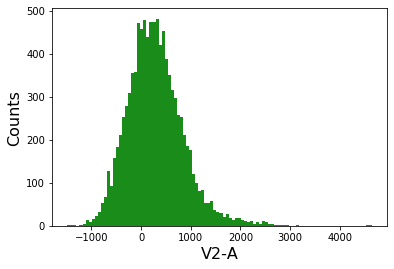

In [21]:
# Plot
tsample.plot('V2-A', bins=100, alpha=0.9, color='green')

In [22]:
tsample.channel_names


('HDR-T',
 'FSC-A',
 'FSC-H',
 'FSC-W',
 'SSC-A',
 'SSC-H',
 'SSC-W',
 'V2-A',
 'V2-H',
 'V2-W',
 'Y2-A',
 'Y2-H',
 'Y2-W',
 'B1-A',
 'B1-H',
 'B1-W')

In [23]:
tsample.meta

{'__header__': {'FCS format': b'FCS3.0',
  'text start': 256,
  'text end': 1824,
  'data start': 1892,
  'data end': 641891,
  'analysis start': 0,
  'analysis end': 0},
 '$BYTEORD': '1,2,3,4',
 '$DATATYPE': 'F',
 '$NEXTDATA': 0,
 '$TOT': 10000,
 '$MODE': 'L',
 '$PAR': 16,
 '$FIL': 'EY_2013-07-19_PID_101_MG1655_Transformants_D01_Well_A3.001.fcs',
 '$OP': 'Eugene',
 '$SYS': 'MACSQuantify,2.4.1247.1dev',
 '$CYT': 'MACSQuant',
 '$CYTSN': '3057',
 '$SRC': 'A3',
 '$CELLS': 'PID_101_MG1655_Transformants_D01',
 '$DATE': '2013-Jul-19',
 '$BTIM': '11:47:24',
 '$ETIM': '11:47:46',
 '$BEGINSTEXT': '0',
 '$ENDSTEXT': '0',
 '$BEGINANALYSIS': '0',
 '$ENDANALYSIS': '0',
 '$BEGINDATA': '1892',
 '$ENDDATA': '641891',
 '_channels_':                  $PnN    $PnR   $PnS                  $PnE $PnG  $PnB
 Channel Number                                                       
 1               HDR-T  262144  HDR-T  [0.000000, 0.000000]    1    32
 2               FSC-A  262144  FSC-A  [0.000000, 0.000000]   

In [24]:
type(tsample)


FlowCytometryTools.core.containers.FCMeasurement

(array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([-1.23705005e+03, -1.20081295e+03, -1.16457585e+03, -1.12833875e+03,
        -1.09210166e+03, -1.05586456e+03, -1.01962746e+03, -9.83390360e+02,
        -9.47153262e+02, -9.10916163e+02, -8.74679065e+02, -8.38441967e+02,
        -8.02204868e+02, -7.65967770e+02, -7.29730671e+02, -6.93493573e+02,
        -6.57256475e+02, -6.21019376e+02, -5.84782278e+02, -5.48545179e+02,
        -5.12308081e+02, -4.76070983e+02, -4.39833884e+02, -4.03596786e+02,
        -3.67359688e+02, -3.31122589e+02, -2.94885491e+02, -2.58648392e+02,
        -2.22411294e+02, -1.86174196e+02, -1.49937097e+02, -1.13699999e+02,
        -7.74629004e+01, -4.12258020e+01, -4.98870361e+00,  3.12483948e+01,
         6.74854932e+01,  1.037

/home/alex/.local/lib/python3.6/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


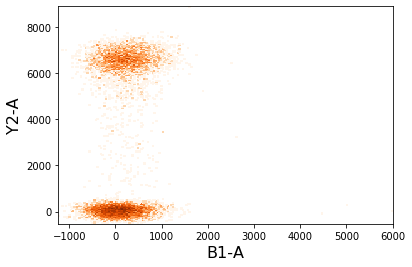

In [25]:
tsample.plot(['B1-A', 'Y2-A'], cmap=cm.Oranges, colorbar=False)

In [52]:
# Create Threshold gate with Y2-A value below 1000
y2_gate_below = ThresholdGate(300.0, ['Y2-A'], region='below')
y2_gate_above = ThresholdGate(-300.0, ['Y2-A'], region='below')

# Gate for event B1-A value above 2000.0
b1_gate = ThresholdGate(2000.0, ['B1-A'], region='above')

In [53]:
# Use interavtive GUI
# tsample.view_interactively(backend='webagg')

Text(0.5, 1.0, 'Gate Plotted')

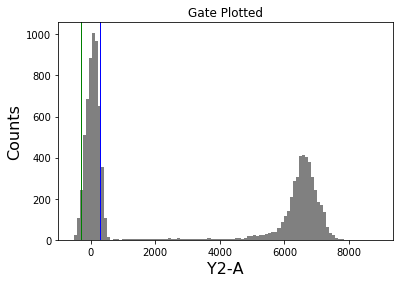

In [54]:
# Apply gates
figure()
tsample.plot(['Y2-A'], gates=[y2_gate_below, y2_gate_above], bins=100)
title('Gate Plotted')

In [15]:
# Apply gates
gated_sample = tsample.gate(y2_gate)
print(gated_sample.get_data().shape[0])

4433


In [55]:
# WORKING WITH PLATES
# Loading data using FCPlate
from FlowCytometryTools import FCPlate

In [58]:
sample1 = FCMeasurement('B1', datafile=datafile)
sample2 = FCMeasurement('D2', datafile=datafile)

In [60]:
plate1 = FCPlate('Demo plate', [sample1, sample2], 'name', shape=(4,3))
print(plate1)


ID:
Demo plate

Data:
    1   2 3
A          
B  B1      
C          
D      D2  


In [63]:
# Specify sample positions independent of the sample IDs using a dictionary - alternate method
plate2 = FCPlate('Demo alt plate', {'C2': sample1, 'C3': sample2}, 'name', shape=(4,3))
print(plate2)

ID:
Demo alt plate

Data:
  1   2   3
A          
B          
C    B1  D2
D          


In [64]:
# Sample 1 can be accessed by C2 index
print(plate2['C2'])

<FCMeasurement 'B1'>


In [ ]:
# Better way of loading data - using FCPlate to load all *.fcs files
